# Predectiong Historical Cost of Ride. Case-Study-EDA using Python

### Objective
The objective of this case study is to analyze historical ride data and build a predictive model to forecast the cost of a ride based on various factors such as Number_of_Riders	Number_of_Drivers	Location_Category	Customer_Loyalty_Status	Number_of_Past_Rides	Average_Ratings	Time_of_Booking	Vehicle_Type	Expected_Ride_Duration	and Historical_Cost_of_Ride

### About dataset 

The given dataset consists of data related to ride-sharing service costs, encompassing various
factors that could influence the dynamic pricing model of rides. It includes 1,000 records with
the following key attributes:

### Business problrm

Analyze the historical ride data to identify the most important features that contribute to the Historical Cost of Ride. Develop a predictive model to estimate the cost of a ride based on these features.

   Dataset consists of various factors that could influence the dynamic pricing model of rides. It includes 1000 records with he following key attributes:
   
   - Number_of_Riders: The number of riders participating in the ride.
   - Number_of_Drivers: The number of drivers available at the time of booking.
   - Location_Category: The category of the location (Urban, Suburban, Rural).
   - Customer_Loyalty_Status: The loyalty status of the customer (e.g., Silver, Regular).
   - Number_of_Past_Rides: The number of past rides the customer has had.
   - Average_Ratings: The average ratings given to the drivers by the customer.
   - Time_of_Booking: The time of the day when the booking was made.
   - Vehicle_Type: The type of vehicle booked for the ride.
   - Expected_Ride_Duration: The expected duration of the ride in minutes.
   - Historical_Cost_of_Ride: The cost of the ride, which serves as the target variable for
    predictive modeling.

### Libraries Used:
    
    1. Numpy
    2. Pandas
    3. Matplotlib
    4. Seaborn


###  Importing Libraries , Loading the data and Basic Observations

In [704]:
#1. Start the EDA by importing the necessary Python libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import plotly.express as px

In [705]:
df=pd.read_csv("C:/Users/hp/Downloads/dynamic_pricing.csv")

In [706]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [707]:
df.shape

(1000, 10)

There are  1000 rows and 10 columns in dataset 

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


1:  There are four attributes that data type is object ,and there is no null values in any column, hance there are four catagorical columns 

2:  There is not any  wrong data type in dataset

In [709]:
df.nunique() 

Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64

'Historical_Cost_of_Ride ' has all the unique values,catagorical columns Location_Category' ,Customer_Loyalty_Status ,Time_of_Booking   and Vehicle_Type  are further catagories in to 3,3,4 and 2 catagories respectivly. 

In [710]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [711]:
df.describe(include="object")

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


### 2. Data Cleaning

In [712]:
# 2. Perform data quality check to identify any missing values or incorrect data types
df.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

There is not any  null value  in dataset .

In [713]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

There is not any duplicate values in dataset 

In [714]:
df['Historical_Cost_of_Ride']=df['Historical_Cost_of_Ride'].round().astype(int)


Round off 'Historical_Cost_of_Ride' and convert type to an intiger

# Data Exploration and  Visualization

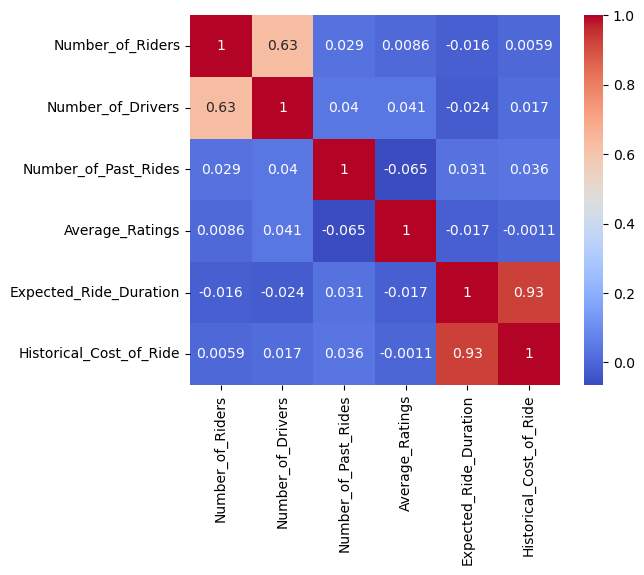

In [715]:
# 3. Analyze the distribution of numerical features to understand their distribution.
numerical_features = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()


- Expected_Ride_Duration' is heighly corelated for predicting the 'Historical_Cost_of_Rid
- Avg rating has the negitive corellation with 'Historical_Cost_of_Rid
- Number of riders and drivers are also coreladed

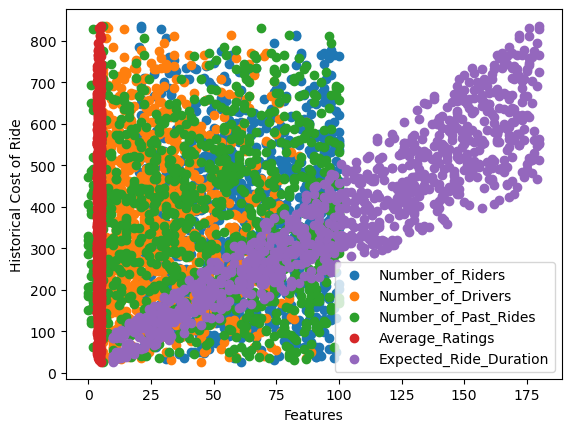

In [716]:
# 8. Perform Bivariate Analysis to explore the relationships between the target variable
# (Historical_Cost_of_Ride) and the other features. (Hint: use scatter plots of numerical
# features against the Historical_Cost_of_Ride)
numerical_features = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration']

for feature in numerical_features:
    plt.scatter(df[feature], df['Historical_Cost_of_Ride'], label=feature)

plt.xlabel('Features')
plt.ylabel('Historical Cost of Ride')
plt.legend()
plt.show()

- Only 'Expected ride duration'Historical_Cost_of_Rid has the linear relation for predicting the historical cost 
- others features like 'Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', and  'Average_Ratings', a indicate that the data is aproximatly uniformly distributed with in 0 to 100 range. 
- Avg ratating has negitive relation with historical cost .
- numbers of past riders are more than numbers of riders 
- number of riders are also aproximatly uniformly distributed in a specific range when there are  less riders with avg cost as compare to high and low cost .

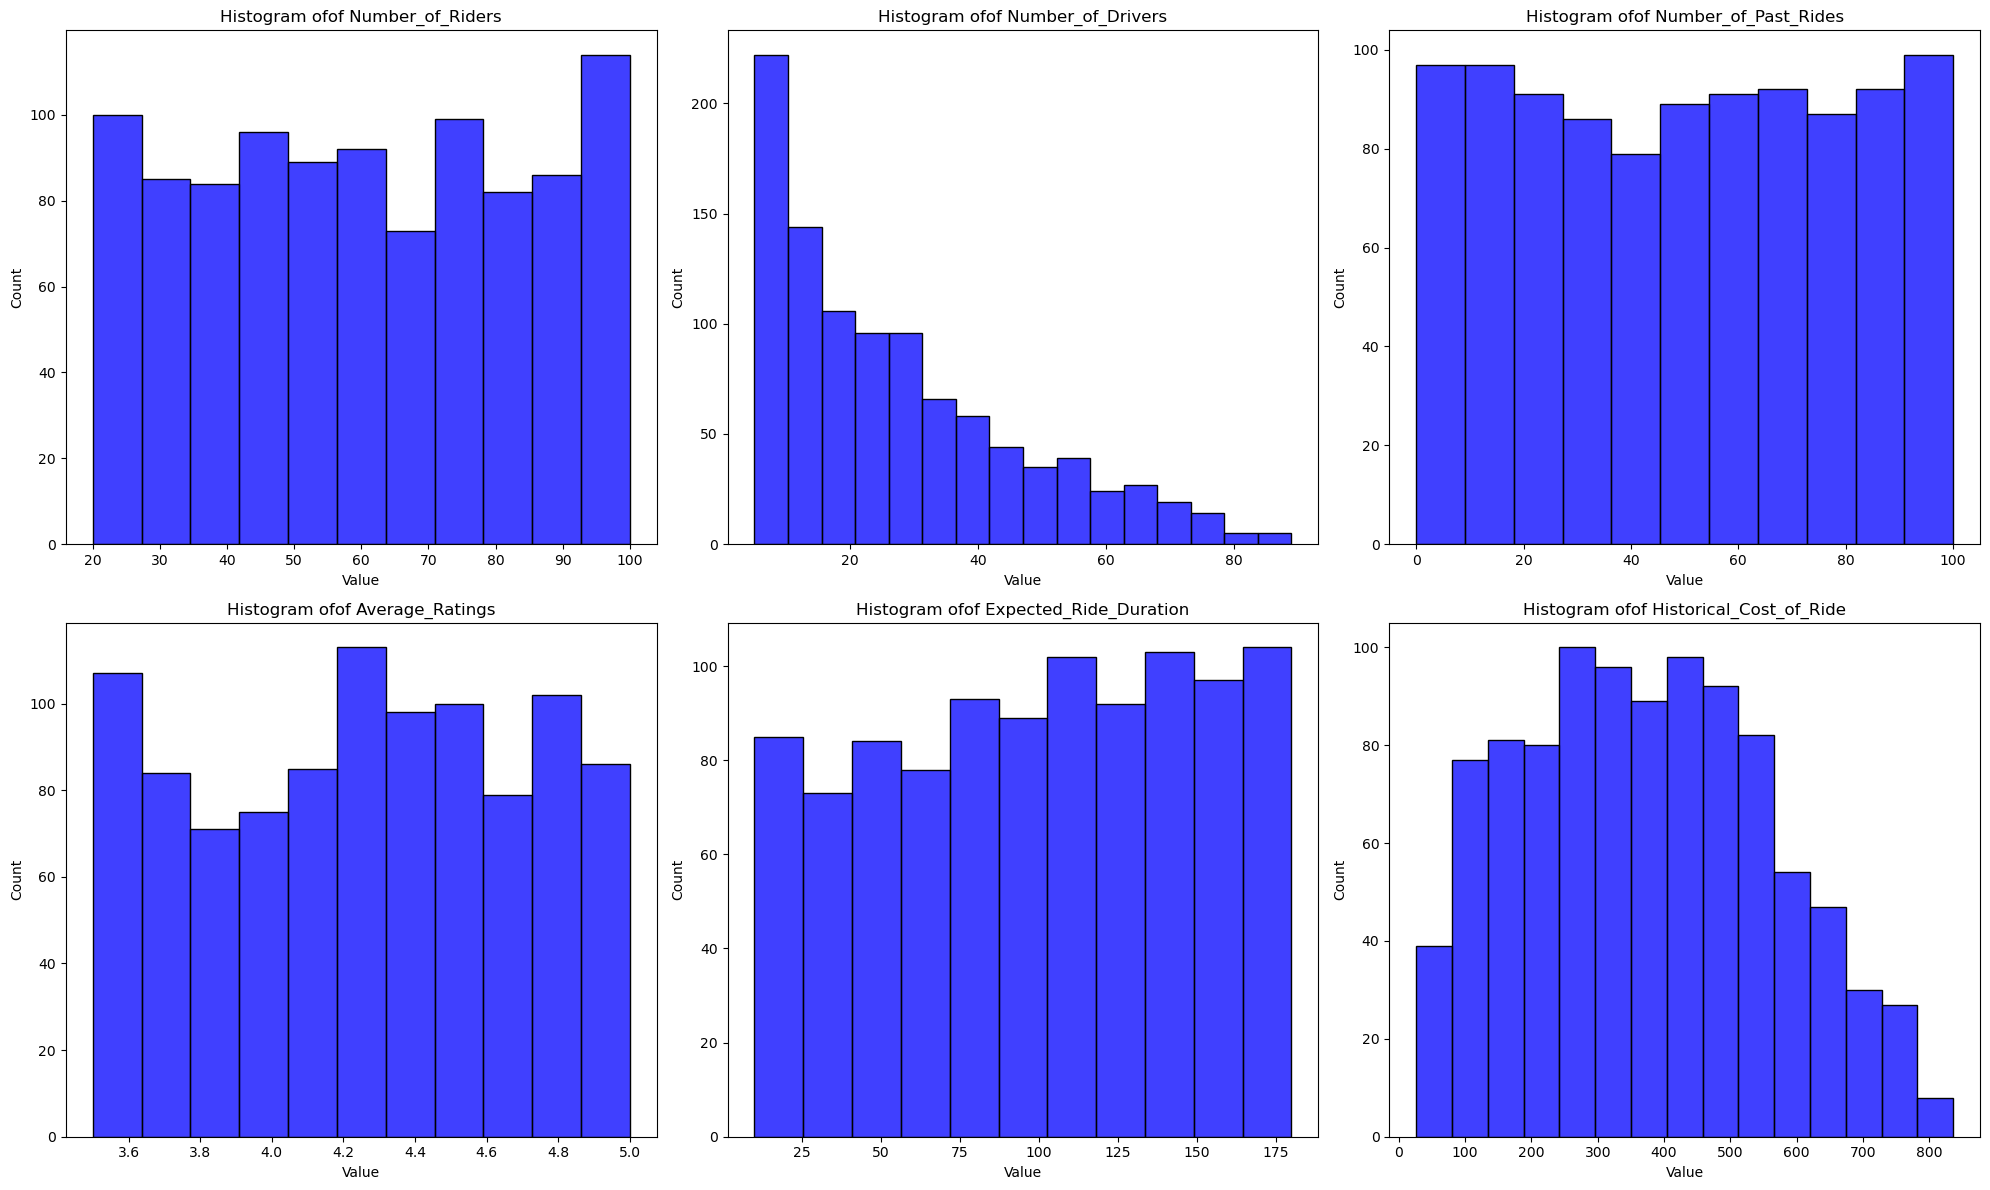

In [717]:

# Select numerical features
numerical_features = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

# Plot box plots for numerical features
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(df[feature], ax=axs[row, col], color='blue')
    axs[row, col].set_title(f'Histogram ofof {feature}')
    axs[row, col].set_xlabel('Value')

# Layout so plots do not overlap
fig.tight_layout()

# Save the figure to a file
plt.savefig('box_plots.png')

# Show the plot
plt.show()



- The number of riders ranges from 2 to 100, with an average of 60.
- Driver demand exhibits an inverse relationship with availability.
- On average, around 50 riders have had prior rides.
- The majority of riders receive an average rating of 4.3.
- Ride durations typically fall between 80 and 177 km, with an average of 100.
- The historical cost of rides averages 350, with a concentration of rides in the 300-500 cost range.

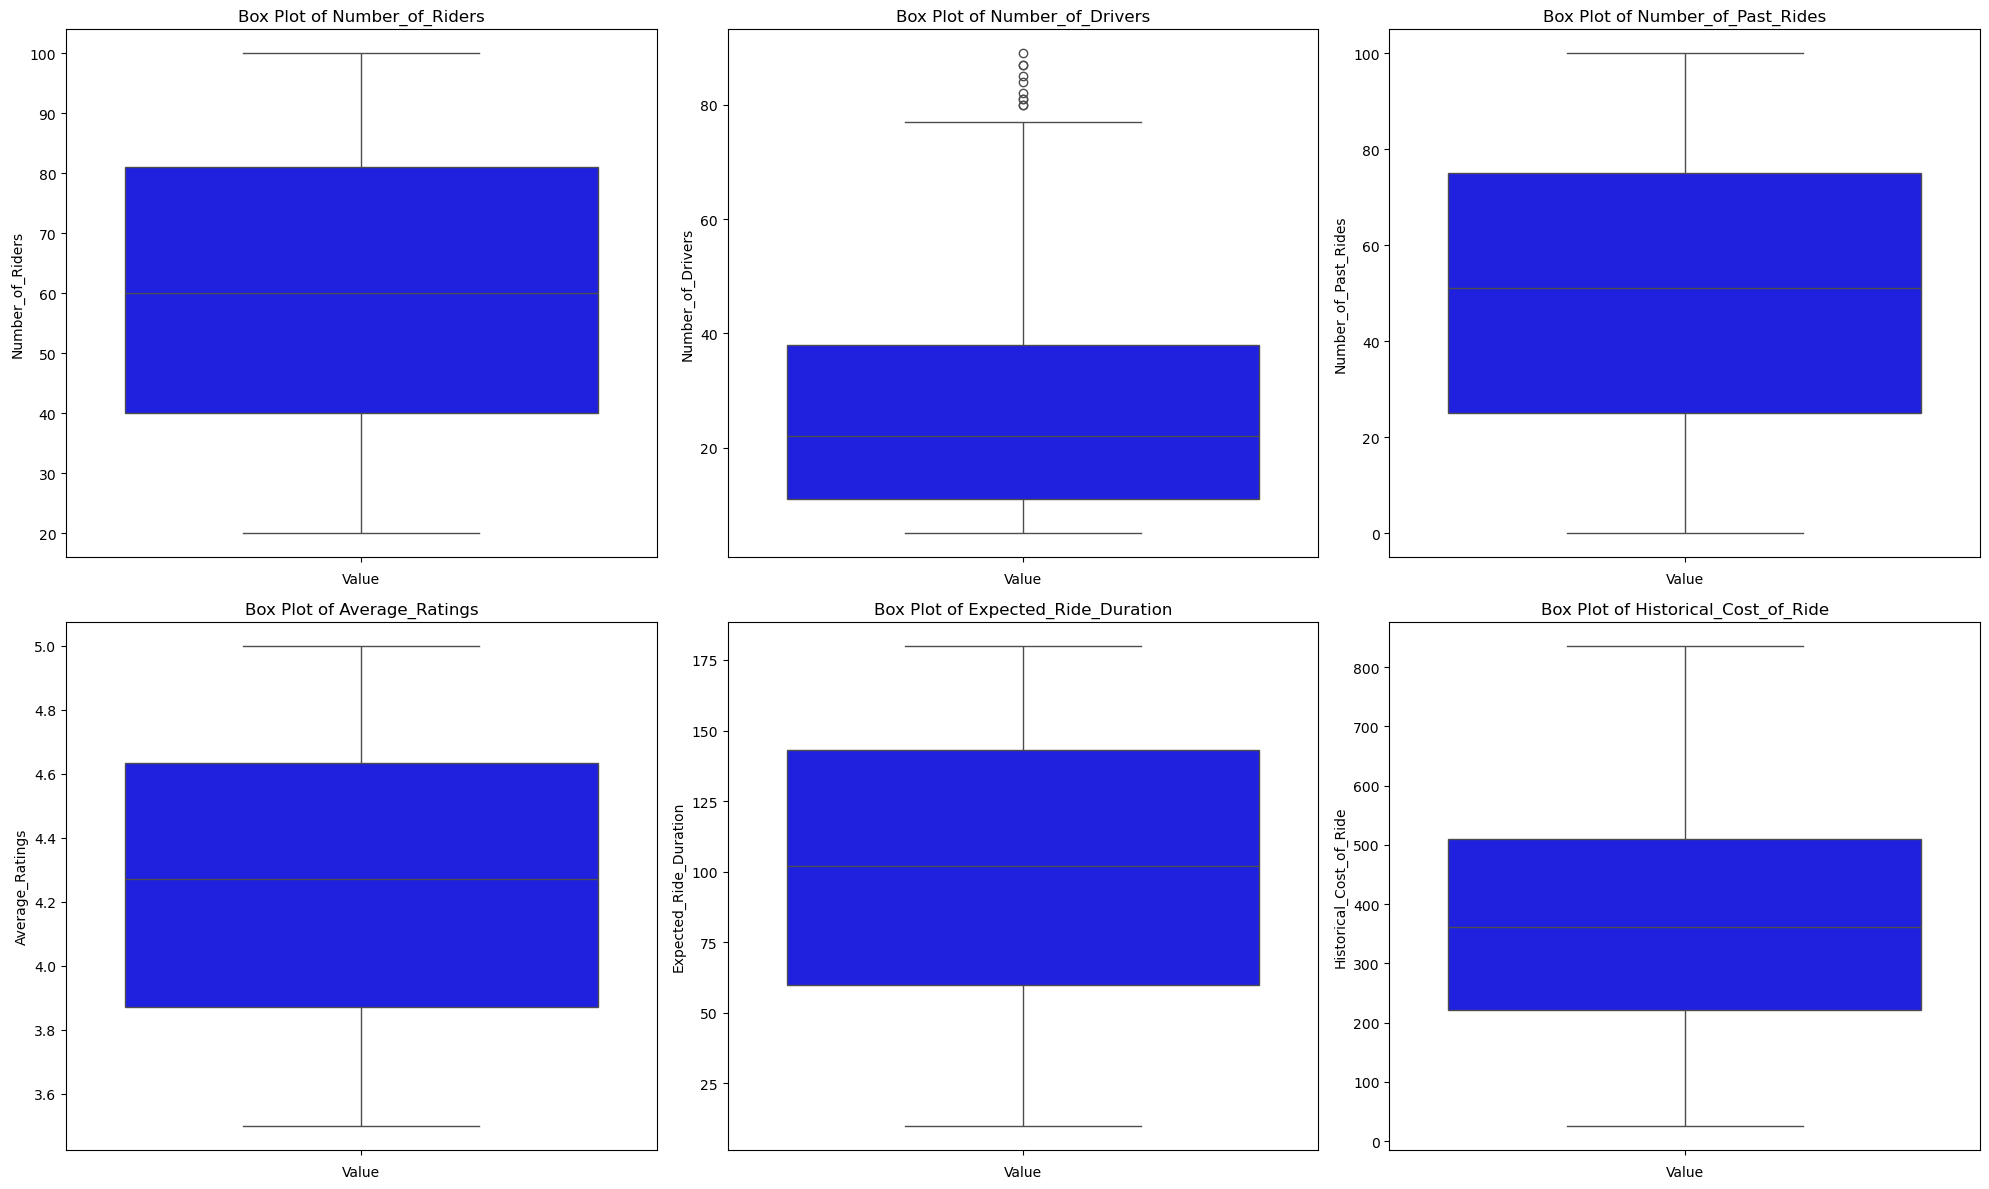

In [718]:

# 4. Plot distributions for numerical features.

# Select numerical features
numerical_features = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

# Select numerical features
numerical_features = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

# Plot box plots for numerical features
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(df[feature], ax=axs[row, col], color='blue')
    axs[row, col].set_title(f'Box Plot of {feature}')
    axs[row, col].set_xlabel('Value')

# Layout so plots do not overlap
fig.tight_layout()

# Save the figure to a file
plt.savefig('box_plots.png')

# Show the plot
plt.show()




   - .**Nnumber of riders** plot date is normaly distributed across its mean value that is 60 and data is     disperse   between 20 to 100  with no outlier .
   - **Numbers of Drivers** plot data is not normaly distribute it has right skewd  and few outliers.
   - **Number of past riders** plot has normal data distribution and has all the values 0 to 100 with no outlier
   - **Avg rating** avg ratting is about 4 low ratting is below 3.6. it contains no outlier 
   - **Expected right duration** plot has as normal data distribution  with no outlier
   - **Historical cost of ride** plot data is slighty no normal mean is 137 and Q3 is aprox 500 



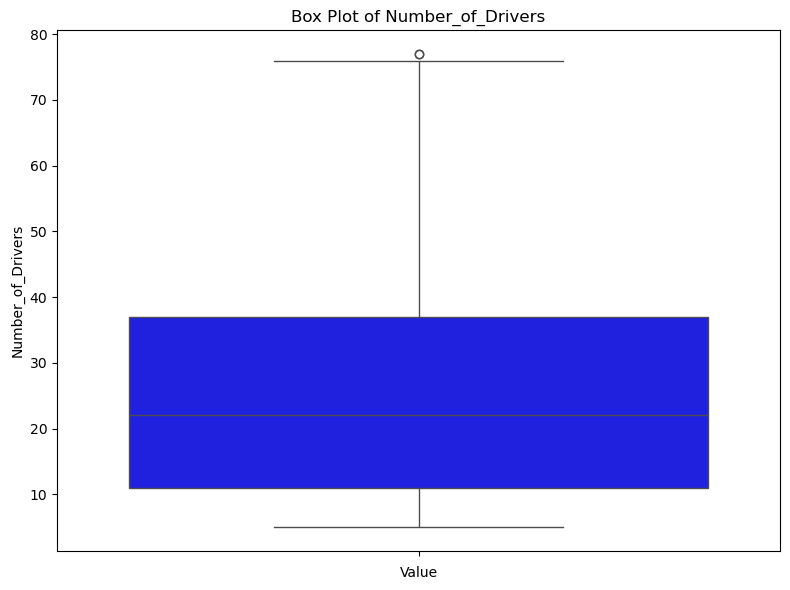

In [719]:

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a box plot for 'Number_of_Drivers'
Q1 = df['Number_of_Drivers'].quantile(0.25)
Q3 = df['Number_of_Drivers'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['Number_of_Drivers'] < (Q1 - 1.5 * IQR)) | (df['Number_of_Drivers'] > (Q3 + 1.5 * IQR)))]
sns.boxplot(df_no_outliers['Number_of_Drivers'], ax=ax, color='blue')

# Set title and labels
ax.set_title('Box Plot of Number_of_Drivers')
ax.set_xlabel('Value')

# Layout so plots do not overlap
fig.tight_layout()

# Save the figure to a file
plt.savefig('number_of_drivers_box_plot.png')

# Show the plot
plt.show()


Outliers are removed 

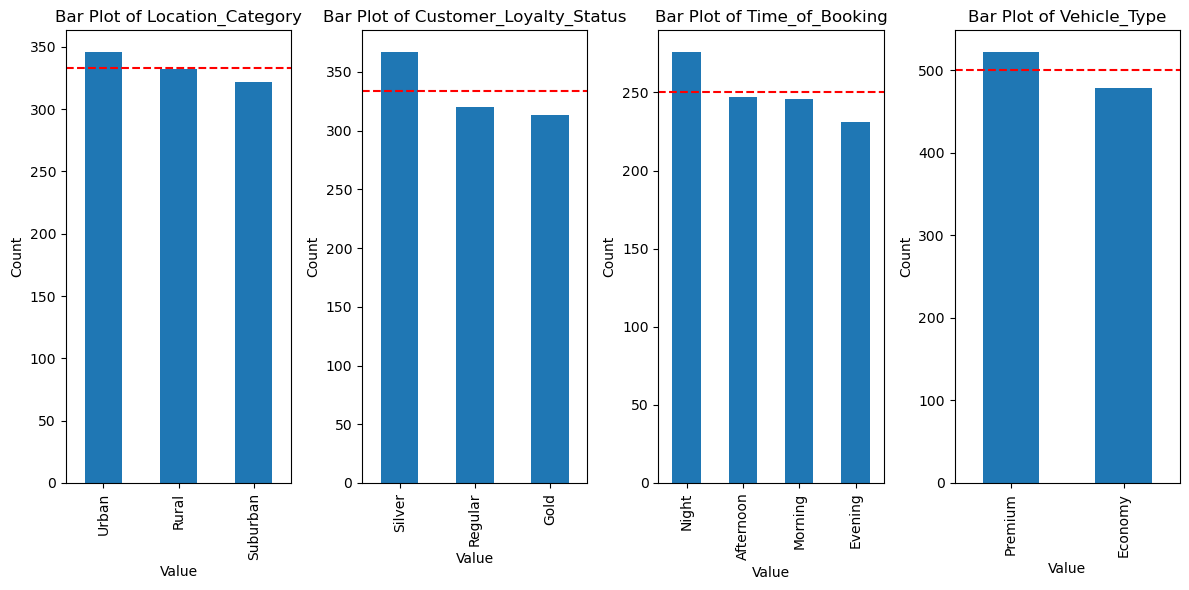

In [720]:
# 6. Plot the counts of each category for the categorical features.
import matplotlib.pyplot as plt

# Select categorical features
categorical_features = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

# Create a figure with multiple subplots
fig, axs = plt.subplots(1, len(categorical_features), figsize=(12, 6))

# Plot bar plots for categorical features
for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Bar Plot of {feature}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Count')
    axs[i].axhline(y=df[feature].value_counts().mean(), color='r', linestyle='--')  # Add horizontal line

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

- Urban locations have the most riders.
- Most drivers have Silver loyalty status.
- Riders prefer nighttime travel.
- Premium vehicle types are the most popular choice.

In [721]:
categorical_features = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
for i in categorical_features:
    print(df.groupby(i)['Historical_Cost_of_Ride'].agg(['sum', 'count', 'mean', 'median', 'std']))

                      sum  count        mean  median         std
Location_Category                                               
Rural              126141    332  379.942771   367.5  187.231087
Suburban           120521    322  374.288820   362.5  187.309131
Urban              125825    346  363.656069   360.0  187.129344
                            sum  count        mean  median         std
Customer_Loyalty_Status                                               
Gold                     117727    313  376.124601   374.0  184.974913
Regular                  121629    320  380.090625   359.0  189.600441
Silver                   133131    367  362.754768   349.0  186.957345
                    sum  count        mean  median         std
Time_of_Booking                                               
Afternoon         94057    247  380.797571   387.0  195.393847
Evening           84141    231  364.246753   361.0  185.350513
Morning           93001    246  378.052846   382.0  180.386708
Night

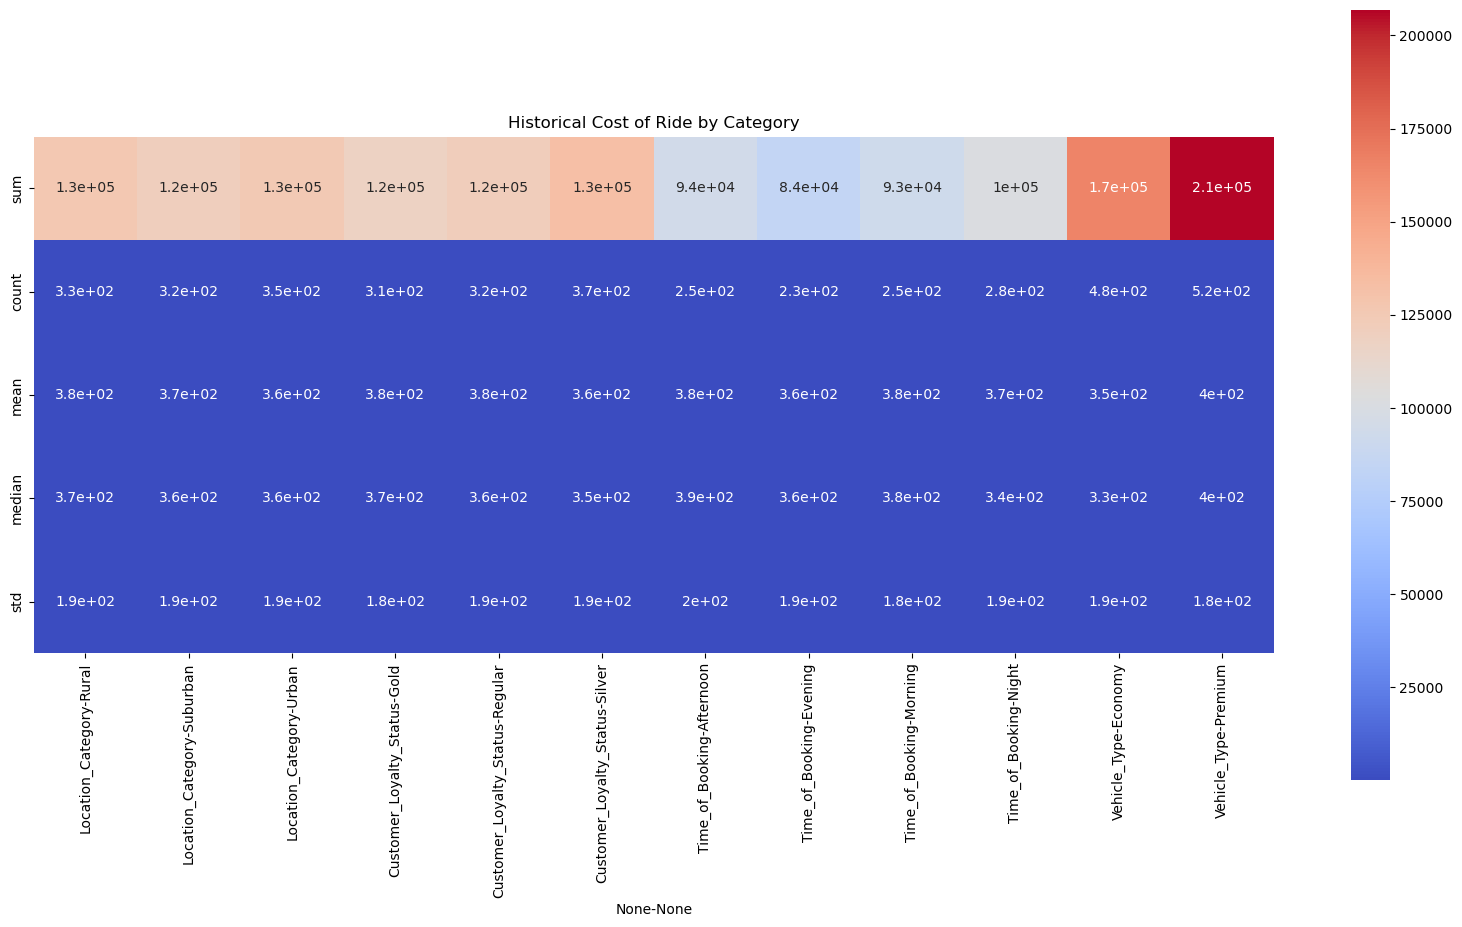

In [722]:
# 7. Give Analysis Summary for Categorical and Numerical Features.
# Create a dictionary to store the grouped dataframes
grouped_dfs = {}

# Group the data by each categorical feature
for feature in categorical_features:
    grouped_dfs[feature] = df.groupby(feature)['Historical_Cost_of_Ride'].agg(['sum', 'count', 'mean', 'median', 'std']).T

# Concatenate the grouped dataframes
df_concat = pd.concat(grouped_dfs, axis=1)

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_concat, annot=True, cmap='coolwarm', square=True)
plt.title('Historical Cost of Ride by Category')
plt.show()


### summary 


Catagorical features 
- It is clearly seen that that  vehcal type has high impect on historical cost .There is clearly difference  
between their means . 
- location impect is not heigh as compare to vehcal type.
- coustomer loyality status has least impect on historical cost


 Numerical Features.
 - Expected_Ride_Duration' is heighly corelated for predicting the 'Historical_Cost_of_Rid
- Avg rating has the negitive corellation with 'Historical_Cost_of_Rid

# Feature Engneering 

In [723]:
oe = OrdinalEncoder()
df['Customer_Loyalty_Status_Encoded'] = oe.fit_transform(df['Customer_Loyalty_Status'].values.reshape(-1, 1))

# Change the encoded values using replace
df['Customer_Loyalty_Status_Encoded'] = df['Customer_Loyalty_Status_Encoded'].replace({0: 2, 1: 0, 2: 1})

print(df[['Customer_Loyalty_Status', 'Customer_Loyalty_Status_Encoded']])

    Customer_Loyalty_Status  Customer_Loyalty_Status_Encoded
0                    Silver                              1.0
1                    Silver                              1.0
2                    Silver                              1.0
3                   Regular                              0.0
4                   Regular                              0.0
..                      ...                              ...
995                    Gold                              2.0
996                 Regular                              0.0
997                    Gold                              2.0
998                 Regular                              0.0
999                    Gold                              2.0

[1000 rows x 2 columns]


column 'Customer_Loyalty_Status 'is **Ordinal Encoded** to transform data in numerirical data

In [724]:
df['Location_Category'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [725]:
ol=OrdinalEncoder()
df['Location_Category_Encoded']=ol.fit_transform(df['Location_Category'].values.reshape(-1,1))
print(df[["Location_Category_Encoded","Location_Category"]])

     Location_Category_Encoded Location_Category
0                          2.0             Urban
1                          1.0          Suburban
2                          0.0             Rural
3                          0.0             Rural
4                          0.0             Rural
..                         ...               ...
995                        2.0             Urban
996                        2.0             Urban
997                        1.0          Suburban
998                        1.0          Suburban
999                        0.0             Rural

[1000 rows x 2 columns]


column 'Location_Category'is **Ordinal Encoded** to transform data in numerirical data

In [726]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Customer_Loyalty_Status_Encoded,Location_Category_Encoded
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.0000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.487000,0.99300,1.0140
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.157869,0.79598,0.8237
min,20.000000,5.000000,0.000000,3.500000,10.00000,26.000000,0.00000,0.0000
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.000000,0.00000,0.0000
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.000000,1.00000,1.0000
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.250000,2.00000,2.0000
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.000000,2.00000,2.0000


In [727]:
df = df.drop(df.select_dtypes(include=['object']).columns, axis=1)

Drop catagorical column from data fram after encoding 

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number_of_Riders                 1000 non-null   int64  
 1   Number_of_Drivers                1000 non-null   int64  
 2   Number_of_Past_Rides             1000 non-null   int64  
 3   Average_Ratings                  1000 non-null   float64
 4   Expected_Ride_Duration           1000 non-null   int64  
 5   Historical_Cost_of_Ride          1000 non-null   int32  
 6   Customer_Loyalty_Status_Encoded  1000 non-null   float64
 7   Location_Category_Encoded        1000 non-null   float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 58.7 KB


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

Scaled the datafram 

In [ ]:
# Give a short summary of insights gathered from EDA for Feature Selection and list the
# features identified as potentially important for predicting ride costs.

**EDA Summary Insights**

1. Data Overview

- The dataset contains 10,00 rows and 10 columns, with a 6 numerical and 4 categorical variables.
- Notable features doesnt have any missing values.

2. Distribution of Variables

- Numerical Variables:

  - Number_of_Riders mean	60
  - Number_of_Drivers'27
  - Number_of_Past_Rides mean:50
  - Average_Ratings' mean:4.2
  - Expected_Ride_Duration mean: 99
  - Historical_Cost_of_Ride' means 372

- Categorical Variables:
    - data was approximately balanced between the catagories 
    
3. Correlation and Relationships

- Strong positive correlations were found between:
    - Number_of_Drivers and Historical_Cost_of_Ride'
    - Number of riders and drivers 
- Weak correlations were found between:
       - Avg rating and  'Historical_Cost_of_Rid

4. Outliers and Anomalies

   - Outliers were found in the Number of riders column


5. Key Findings and Insights

     Numerical Features.
    - Expected_Ride_Duration' is heighly corelated for predicting the 'Historical_Cost_of_Rid
    - Avg rating has the negitive corellation with 'Historical_Cost_of_Rid
    - it is also observed booking time doesnt has much empact for predicting historical cost  
    Catagorical features 
    -  vehcal type has high impect on historical cost .
    - location impect is not heigh as compare to vehcal type.
    - coustomer loyality status has least impect on historical cost

6. Limitations and Future Work
    - Develop more advanced feature engineering techniques to capture complex relationships and interactions.
    - Explore alternative machine learning algorithms and model architectures to improve performance.
